# Loading Libraries needed For Data Cleaning

In [454]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [456]:
aviation_df = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1') 
#The pandas required an encoding parameter to read the data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10724\762392559.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1')


# Checking the values per Column

In [458]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# DATA CLEANING
In regards to the error message recieved when loading the data its seems the columns;
*Latitude*, *Longitude* and *Broad.phase.of.flight* have mixed types of values. 
This will be the the first step in cleaning the data.
## Drop Irrelevant Columns
I'll drop several columns that would be irrellevant to our analysis i.e 'Airport.Code','Airport.Name','Registration.Number','Model','Amateur.Built','FAR.Description','Schedule','Air.carrier' 
'Latitude' and 'Longitude' as they do not help with our risk assessment.


In [460]:

aviation_df=aviation_df.drop(columns=['Latitude','Longitude','Airport.Code','Airport.Name','Registration.Number','Amateur.Built','FAR.Description','Schedule','Air.carrier'],axis=1 )

In [461]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81793 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Total.Fatal.Injuries    77488 non-null

In [462]:
aviation_df.shape #check the shape of the dataframe

(88889, 22)

In [463]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines',
       'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Check the most highest recurring Airplane Makes
We check to ascertain the spread of the values and know which companies are most popular and affect the reslts the most

In [465]:
aviation_df['Make'].value_counts().head(20)

Make
Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Name: count, dtype: int64

## Check the most highest recurring Airplane Models

In [467]:
aviation_df['Model'].value_counts().head(20)

Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
PA-18         581
PA-18-150     578
PA-28-180     572
PA-28-161     569
PA-28-181     532
206B          524
737           489
PA-38-112     469
150L          461
G-164A        460
Name: count, dtype: int64

## Format The Make Column Into the Title Format 
Change the names into a title format for better combinations later after removing NaN values

In [469]:
aviation_df['Make']=aviation_df['Make'].str.title()

In [470]:
aviation_df['Make'].value_counts().head(20)

Make
Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air Tractor            691
Aeronca                636
Mcdonnell Douglas      608
Maule                  589
Champion               519
Stinson                439
Aero Commander         429
De Havilland           422
Luscombe               414
Name: count, dtype: int64

## Change the Event Date column to Date Time Format
This is to help for better readability with our visualisation tool

In [472]:
pd.to_datetime(aviation_df['Event.Date'])

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

In [473]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Use a function to Create a new column filtering out data in the report status column to the following:
-Pilot
-Engine
-Turbulence
-Fuel
-Weather
-Animals
-Unknown

## Check for specific weather-related words in the 'Report.Status' column and create a new column 'Cause_As_Per_Report'

In [476]:
#I'll use Numpy library to perform this operation using np.where as the conditional operator
import numpy as np
aviation_df['Cause_As_Per_Report'] = np.where(
    aviation_df['Report.Status'].str.contains('pilot|decision', case=False), 'pilot',
    np.where(
        aviation_df['Report.Status'].str.contains('engine|broken|loose|fatigue', case=False), 'engine',
        #Aircraft fatigue, also called metal fatigue, 
        #occurs when metal aircraft components age and weaken over time after repeated exposure to environmental factors
        np.where(
            aviation_df['Report.Status'].str.contains('fuel|fire', case=False), 'Fuel',
            np.where(
                aviation_df['Report.Status'].str.contains('weather|rain|snow|hail|turbulence', case=False), 'Weather',
                np.where(
                    aviation_df['Report.Status'].str.contains('bird|deer|collision', case=False), 'Animals',
                    np.where(
                        aviation_df['Report.Status'].str.contains('Probable Cause|could not be determined', case=False), 'Unknown',
            'Other'))))))#could not be determined

In [477]:
aviation_df.tail(20)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Cause_As_Per_Report
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,Piper,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,pilot
88870,20221215106461,Accident,ERA23LA089,2022-12-13,"Rockingham, NC",United States,Non-Fatal,NaN,NaN,Piper,...,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,20-12-2022,pilot
88871,20221220106480,Accident,WPR23LA072,2022-12-13,"Liberal, KS",United States,Non-Fatal,NaN,NaN,Cessna,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,20-12-2022,pilot
88872,20221214106459,Accident,GAA23WA042,2022-12-14,"Happy Valley-Goose Bay, OF",Canada,Serious,NaN,NaN,Piper,...,NaN,0.0,0.0,2.0,0.0,NaN,NaN,NaN,20-12-2022,pilot
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,Cirrus Design Corp,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,pilot
88874,20221215106462,Accident,CEN23LA064,2022-12-15,"Patterson, LA",United States,NaN,NaN,NaN,Bell,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,pilot
88875,20221219106474,Accident,ANC23LA009,2022-12-15,"Lihue, HI",United States,Serious,NaN,NaN,Beech,...,NaN,0.0,1.0,1.0,0.0,NaN,NaN,NaN,22-12-2022,pilot
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,Swearingen,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,pilot
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,Cessna,...,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,pilot
88878,20221227106496,Accident,WPR23LA074,2022-12-17,"Cottonwood, CA",United States,Minor,NaN,NaN,Royse Ralph L,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022,pilot


In [478]:
aviation_df['Cause_As_Per_Report'].value_counts()

Cause_As_Per_Report
Unknown    61975
pilot      19921
Other       3780
engine      2518
Weather      322
Animals      266
Fuel         107
Name: count, dtype: int64

## Get rid of the Null Values by dropping Null Values Associated With specific columns 
Drop columns 'Aircraft.Category' and 'Publication.Date' since they are irrelevant to our analysis

### Check number of missing values per column

In [481]:
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
Cause_As_Per_Report           0
dtype: int64

In [482]:
aviation_df=aviation_df.drop(columns=['Aircraft.Category','Publication.Date'])

In [483]:
aviation_df=aviation_df.dropna(subset=['Total.Uninjured','Total.Minor.Injuries','Total.Serious.Injuries','Total.Fatal.Injuries','Engine.Type'
                          ,'Number.of.Engines','Aircraft.damage','Injury.Severity', 'Purpose.of.flight', 'Country', 'Report.Status'
                          ])

In [484]:
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     15
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          8
Model                        23
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition            39
Broad.phase.of.flight     16614
Report.Status                 0
Cause_As_Per_Report           0
dtype: int64

In [485]:
aviation_df.shape

(63156, 21)

In [486]:
aviation_df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        11372
Takeoff         9682
Cruise          7867
Maneuvering     6334
Approach        4892
Climb           1516
Taxi            1422
Descent         1335
Go-around       1051
Standing         526
Unknown          456
Other             89
Name: count, dtype: int64

## Majority of the missing values in Broad Phase Of Flight are from the later years and dropping the column will mean we miss valuable data so i will fill the null values with random choice values form the same column.


In [488]:
#I'll use random module to select the values at random and a lambda function to implement those choices
import random
common_values=['Landing', 'Takeoff', 'Cruise', 'Maneuvering', 'Approach', 'Climb', 'Taxi', 'Descent', 'Go-around', 
               'Standing', 'Unknown', 'Other']
aviation_df['Broad.phase.of.flight'] = aviation_df['Broad.phase.of.flight'].apply(lambda x: random.choice(common_values) if pd.isna(x) else x)

In [489]:
aviation_df=aviation_df.dropna(subset=['Model','Location','Weather.Condition','Make'])

In [490]:
aviation_df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Cause_As_Per_Report       0
dtype: int64

In [491]:
aviation_df.shape

(63072, 21)

## Combine The Values with Cessna, Piper and Beech

In [493]:
#Use lambda function to combine them

aviation_df['Make']= aviation_df['Make'].apply(lambda x: 'Cessna' if 'Cessna' in x else x)
aviation_df['Make']= aviation_df['Make'].apply(lambda x: 'Piper' if 'Piper' in x else x)
aviation_df['Make']= aviation_df['Make'].apply(lambda x: 'Beech' if 'Beech' in x else x)

In [494]:
aviation_df['Make'].value_counts().head(20)

Make
Cessna            21212
Piper             11705
Beech              4023
Bell               1776
Mooney             1023
Grumman            1013
Bellanca            877
Hughes              697
Boeing              682
Robinson            587
Aeronca             521
Air Tractor         457
Maule               444
Champion            436
Schweizer           393
Stinson             360
Luscombe            329
Aero Commander      329
Hiller              313
Taylorcraft         312
Name: count, dtype: int64

## Check for duplicates in The Event Id column

In [496]:
#Use .duplicates method
duplicates = aviation_df['Event.Id'].duplicated()
duplicates #None found

0        False
1        False
3        False
6        False
7        False
         ...  
88639    False
88647    False
88661    False
88735    False
88767    False
Name: Event.Id, Length: 63072, dtype: bool

In [497]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,63072.000000,63072.000000,63072.000000,63072.000000,63072.000000
mean,1.118547,0.386178,0.209570,0.282915,2.297057
std,0.388075,2.774711,0.779202,1.279852,14.698642
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,81.000000,125.000000,507.000000


# Visualisation

I'll use four variables to find the best possible plane maker;
- 'Total.Fatal.Injuries'
- 'Total.Uninjured'
- 'Aircraft.damage'
- 'Make'
I'll use the mean for the numerical variables as the 'Make' Category is too spread to get a clear picture of which plane is best since it's clustered around the aforementioned big three

In [499]:
## Bar Charts for the Fatal Injuries and Total Uninjured by Aircraft Maker

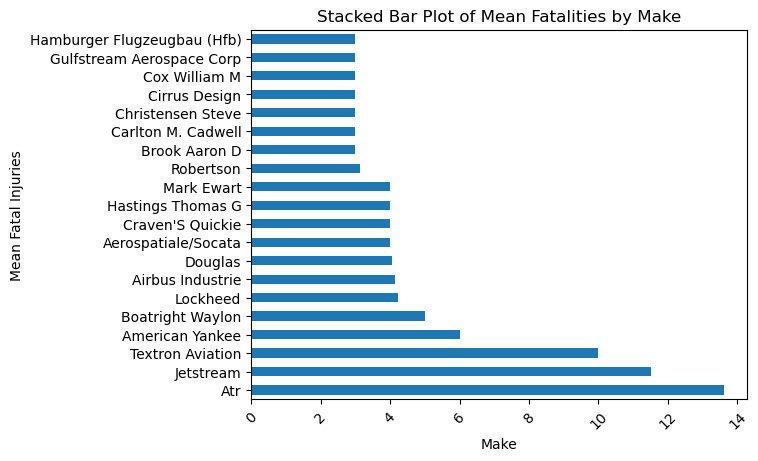

In [500]:
# Aggregate the mean number of fatalities by make
mean_fatalities_by_make = aviation_df.groupby('Make')['Total.Fatal.Injuries'].mean()

# Get the top 20 makes by mean fatalities as the makes are too many to plot visibly on the notebook
top_10_mean_makes = mean_fatalities_by_make.nlargest(20)

# Create a DataFrame for the top 20 makes
top_10_mean_df = top_10_mean_makes.reset_index()

# Plot the bar plot
top_10_mean_df.plot(kind='barh', x='Make', y='Total.Fatal.Injuries', stacked=True, legend=False)
plt.title('Stacked Bar Plot of Mean Fatalities by Make')
plt.xlabel('Make')
plt.ylabel('Mean Fatal Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

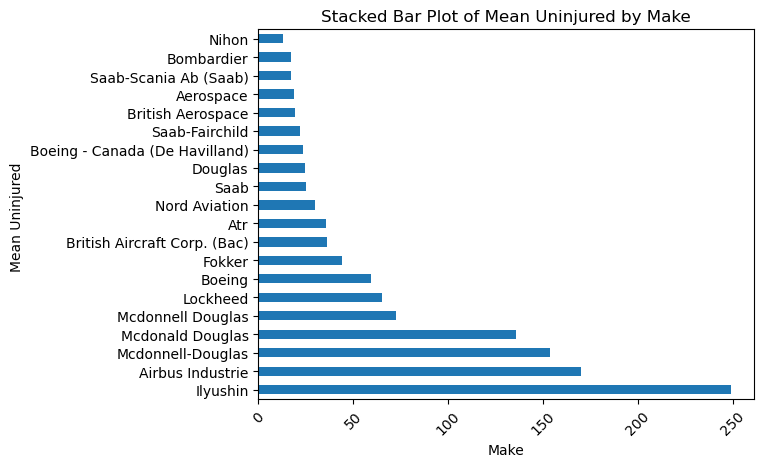

In [501]:
# Aggregate the mean number of fatalities by make
mean_fatalities_by_make = aviation_df.groupby('Make')['Total.Uninjured'].mean()
top_10_mean_makes = mean_fatalities_by_make.nlargest(20)

# Create a DataFrame for the top 20 makes
top_10_mean_df = top_10_mean_makes.reset_index()

# Plot the bar plot
top_10_mean_df.plot(kind='barh', x='Make', y='Total.Uninjured', stacked=True, legend=False)
plt.title('Stacked Bar Plot of Mean Uninjured by Make')
plt.xlabel('Make')
plt.ylabel('Mean Uninjured ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [502]:
## Stacked Bar Chart For the Airplane Damage Per Airplane Maker

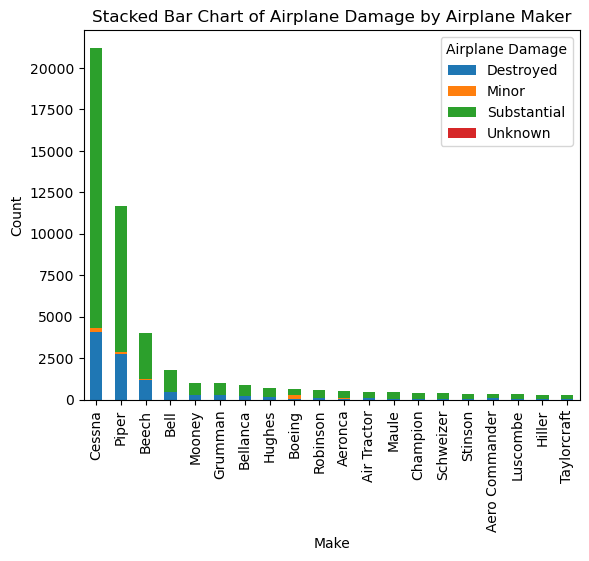

In [503]:
grouped = aviation_df.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Count')

# create a pivot the table avi_df to have 'Aircraft.damage' as columns
avi_df = grouped.pivot_table(index='Make', columns='Aircraft.damage', values='Count', fill_value=0)

# Calculate total damage counts per maker
avi_df['Total'] = avi_df.sum(axis=1)

# Sort makers by total damage counts and select top 20
top_20_makers = avi_df.sort_values(by='Total', ascending=False).head(20)

# Plot stacked bar chart for top 20 makers
top_20_makers.drop('Total', axis=1).plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart of Airplane Damage by Airplane Maker')
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='Airplane Damage')

plt.show()

# Finally: Save the cleaned file in a new csv

In [505]:
cleaned_file_path = 'AviationData_Cleaned.csv'
aviation_df.to_csv(cleaned_file_path, index=False)